### Train network on the Oxford Pets dataset to classify cats and dogs images

To download the dataset, run the following cell:

In [ ]:
#from dataset_oxford_pets_classification import download
#download(directory='data')

In [1]:
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path
import train_oxford_pets_classification as train

params = {
    # Dataset
    'root_dir': Path('data'), 
    'train_val_split': 0.1,      
    # Model
    'pre_trained': True,
    # Training
    'epochs': 5,
    'lr': 0.01,
    'batch_size_train': 32,
    'batch_size_valid': 32, 
    'momentum': 0.9,
    'weight_decay': 0.,
    'seed': 12,
    'loss': 'cross_entropy',
    'scheduler_power': 0.9,
    'class_weights': (0.675, 0.325),
    # Efficiency
    'device': 'cuda',
    'num_workers': 3,  
    'use_amp': True,
    'pin_memory': False,
    'non_blocking': False,
    # Logging
    'log_dir': 'logs/logs_class',
    'experiment':'test_efficientnet_notrain',
    'save_every':1,                
    'save_best':True,
    # Other
    'resume': False,
}

logger, ds_train, ds_valid, model = train.run(params)

e:\Miniconda3\envs\pytorch\lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
e:\Miniconda3\envs\pytorch\lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issu

Epoch 1/5
Batch 104/104, Train loss: 0.024822894483804703
Epoch finished in 27.9 seconds
Train loss: 0.21751801840565055, Valid loss: 0.03343735262751579, Acc: 0.989130437374115
Epoch 2/5
Batch 104/104, Train loss: 0.058681309223175055
Epoch finished in 13.2 seconds
Train loss: 0.11203969286187836, Valid loss: 0.04050244763493538, Acc: 0.9836956262588501
Epoch 3/5
Batch 104/104, Train loss: 0.118164092302322395
Epoch finished in 13.9 seconds
Train loss: 0.078627306473068, Valid loss: 0.01823684386909008, Acc: 0.9945651888847351
Epoch 4/5
Batch 104/104, Train loss: 0.049471657723188417
Epoch finished in 13.2 seconds
Train loss: 0.07984914747629189, Valid loss: 0.019339758902788162, Acc: 0.9972826242446899
Epoch 5/5
Batch 104/104, Train loss: 0.355669975280761706
Epoch finished in 13.1 seconds
Train loss: 0.0733554446844807, Valid loss: 0.017319506034255028, Acc: 0.9945651888847351


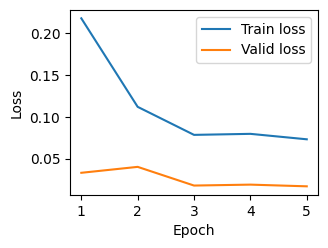

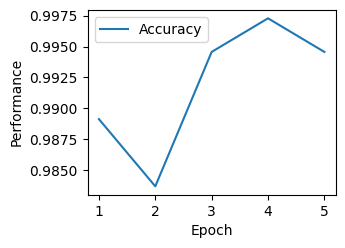

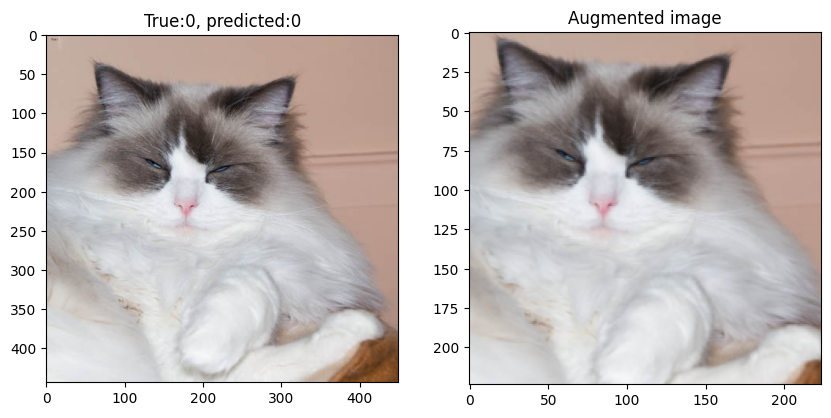

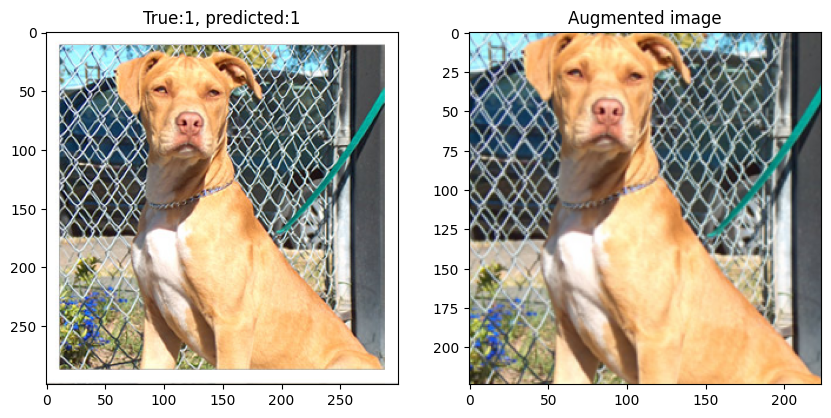

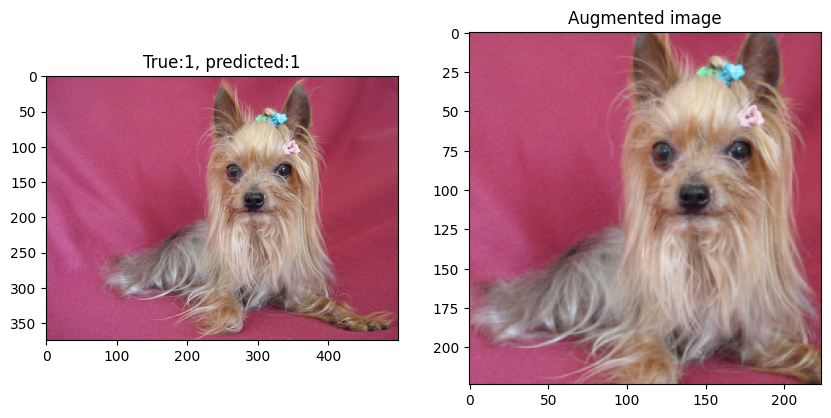

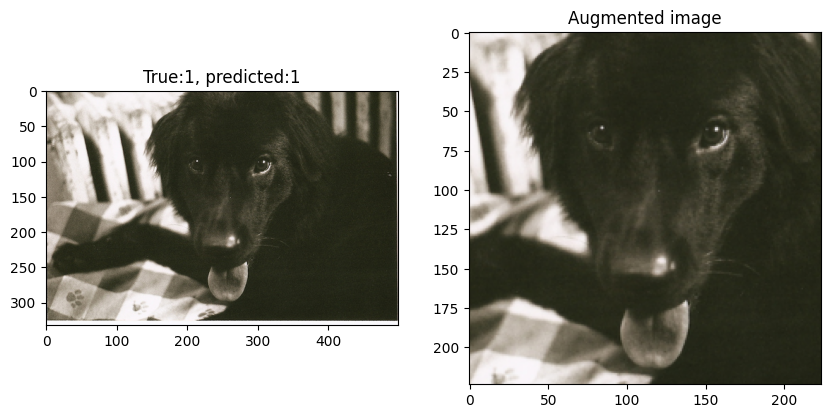

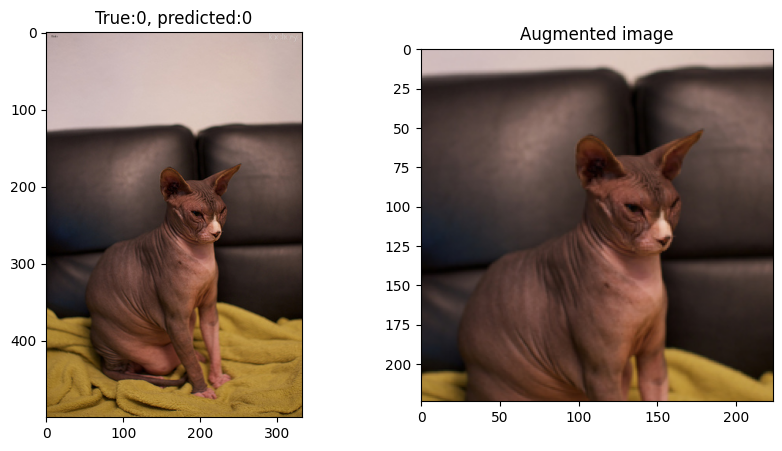

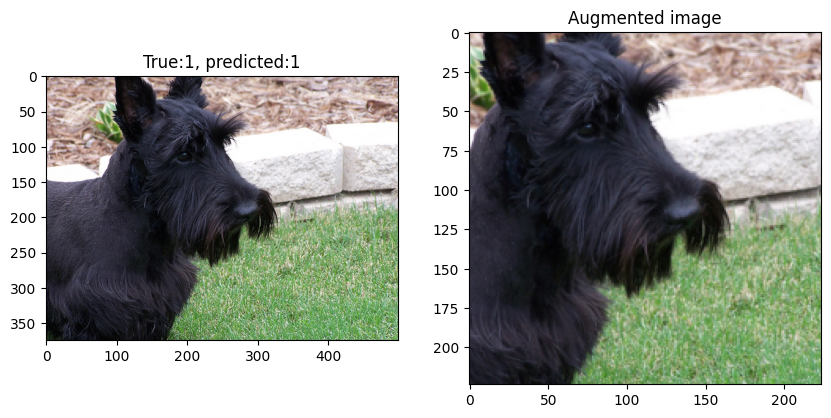

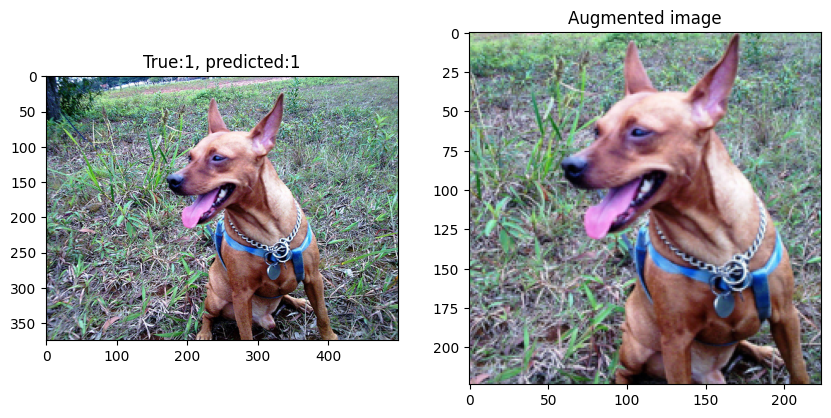

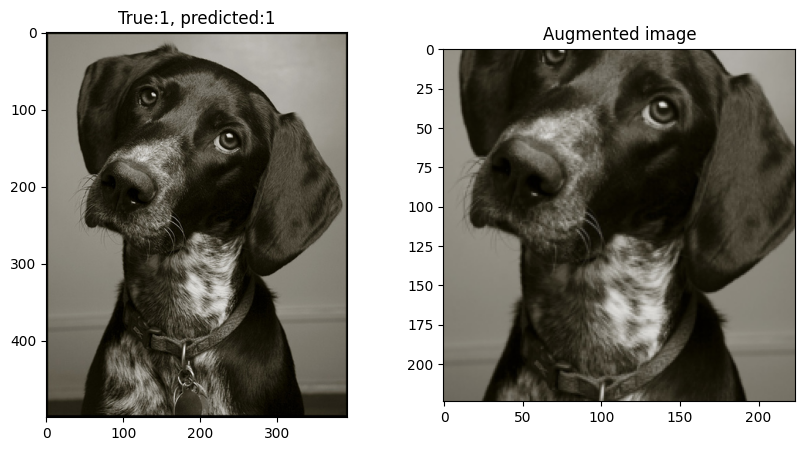

In [2]:
# Plot results
def plot_metrics(logger):
    '''Plot losses and IoU. `lt` is the logger used in Lightning.'''

    epochs, metrics = zip(*logger.data.items())
    train_loss, valid_loss, acc = zip(*metrics)

    plt.figure()
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, valid_loss, label='Valid loss')
    #plt.ylim((0, 1))
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.figure()
    plt.plot(epochs, acc, label='Accuracy')
    #plt.ylim((0.3, 1))
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Performance')

def plot_examples(ds, model, n=4):
    """Plot some example classifications"""

    model.eval()
    model.cuda()
    indices = random.sample(range(len(ds)),n)
    for i, idx in enumerate(indices):
        x, y = ds[idx]
        x_or, _ = ds.getitem(idx)
        with torch.no_grad():
            y_pred = model(x[None].cuda())[0].cpu()
        x = x*0.2347+0.4394
        y_pred = torch.max(y_pred, dim=0)[1]

        plt.figure(figsize=[10,5])
        plt.subplot(1, 2, 1)
        plt.imshow(x_or, 'gray')
        plt.title(f'True:{y}, predicted:{y_pred}')
        plt.subplot(1, 2, 2)
        plt.imshow(x.permute(1, 2, 0), 'gray')
        plt.title('Augmented image')

plot_metrics(logger)
plot_examples(ds_valid, model, n=8)